In [129]:
import os
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
os.chdir('../')

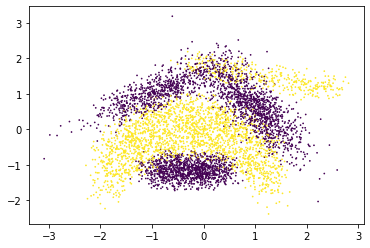

In [5]:
df = pd.read_csv('./data/banana.csv')
X = df.drop('label', axis=1).to_numpy()
y = df['label'].to_numpy()
plt.scatter(X[:,0], X[:,1], c=y, s=0.5)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.91


In [8]:
seed_query = X[np.random.randint(0, X.shape[0])]
print(seed_query)

[-0.248  0.514]


In [60]:
same_class = True
c = clf.predict(seed_query.reshape((1, -1)))
num_queries = 0
while same_class:
    rand_query = np.zeros(seed_query.shape)
    for i in range(seed_query.shape[0]):
        rand_query[i] = seed_query[i] + np.random.randn()
    c_i = clf.predict(rand_query.reshape((1, -1)))
    if c_i != c:
        print("Found a new class after {} queries : {}".format(num_queries, c_i))
        break
    num_queries += 1
print('Out of the loop now.')

Found a new class after 1 queries : [0]
Out of the loop now.


## Run on HAR dataset

In [85]:
X_train = pd.read_csv('./data/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True).to_numpy()
y_train = pd.read_csv('./data/UCI HAR Dataset/train/y_train.txt', delim_whitespace=True).squeeze()
X_test = pd.read_csv('./data/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True).to_numpy()
y_test = pd.read_csv('./data/UCI HAR Dataset/test/y_test.txt', delim_whitespace=True).squeeze()

In [87]:
print("Train dataset shapes: {}, {}".format(X_train.shape, y_train.shape))
print("Test dataset shapes: {}, {}".format(X_test.shape, y_test.shape))

Train dataset shapes: (7351, 561), (7351,)
Test dataset shapes: (2946, 561), (2946,)


In [88]:
clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.93


In [90]:
seed_query = X_test[np.random.randint(0, X_test.shape[0])]

In [127]:
same_class = True
c = clf.predict(seed_query.reshape((1, -1)))
print('Seed class: ', c)
num_queries = 0
while same_class:
    rand_noise = np.random.randn(seed_query.shape[0])
    rand_query = seed_query + rand_noise
    c_i = clf.predict(rand_query.reshape((1, -1)))
    if c_i != c:
        same_class = False
    num_queries += 1
print("Found a new class after {} queries : {}".format(num_queries, c_i))
print("Noise: ", rand_noise.mean())

Seed class:  [4]
Found a new class after 2 queries : [5]
Noise:  0.021480201869959806


### Visualize HAR dataset using PCA

In [136]:
pca = PCA(n_components=2)
X_train_decomposed = pca.fit_transform(X=X_train)
print(X_train_decomposed.shape)

(7351, 2)


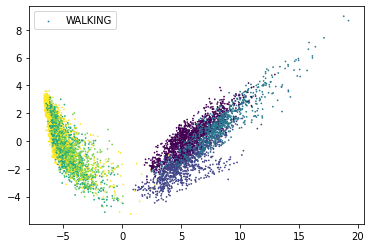

In [139]:
plt.scatter(X_train_decomposed[:,0], X_train_decomposed[:,1], c=y_train, s=0.5)
plt.legend(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])
plt.show()

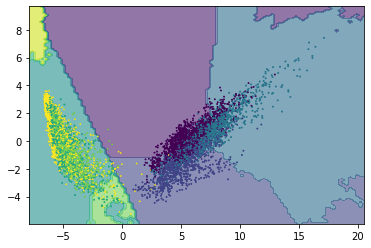

In [145]:
plt.scatter(X_train_decomposed[:, 0], X_train_decomposed[:, 1], c=y_train, s=0.5)

# Create a grid of points over the plot
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Apply the decision function of each tree to the grid of points
x_inverse = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
Z = clf.predict(x_inverse)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X_train_decomposed[:, 0], X_train_decomposed[:, 1], c=y_train, s=0.5)